# Workshop 1: Mobile Price Range Classification

In this workshop we will learn how to train a neural network with numeric data as input to predict the price range of mobile phones ([info of the data](https://www.kaggle.com/iabhishekofficial/mobile-price-classification/data#)). The main blocks of the workshop are:

1. Get the data from Google Drive.
2. Load and Pre-process the data.
3. Define a Fully Connected Neural Network.
4. Choose loss function and optimizer.
5. Train the network.

The main libraries thar will be used in the workshop are:

- Tensorflow
- Keras
- Sci-kit Learn
- Matplotlib
- Numpy
- Pandas

[Reference](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)

## 1. Get the data from Google Drive

In [1]:
'''# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials'''

In [2]:
'''# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)'''

In [3]:
'''# Download data
download = drive.CreateFile({'id': '1igTyUp-YTHG0ig9VeNu83R8jBWn5Djji'})
download.GetContentFile('mobile_price.zip')'''

In [4]:
'''# Extract data from zip file
import zipfile
from pathlib import Path
data_path = Path("./mobile_price.zip")

with zipfile.ZipFile(str(data_path), 'r') as zip_ref:
    zip_ref.extractall("./data")'''

In [5]:
'''# List files of ./data directory
!ls ./data'''

test.csv  train.csv


## 2. Load and Pre-process the data



In [1]:
# Load dependencies for loading data
import numpy as np
import pandas as pd

In [7]:
# Load training dataset and check variables
dataset = pd.read_csv('./data/train.csv')

In [8]:
# Show variables
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
# Show first 5 rows
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
# Import dependencies for pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [11]:
# Convert pandas Dataframe to Numpy Array
dataset_numpy = dataset.values

In [12]:
# Show data type before and after conversion
print(type(dataset))
print(type(dataset_numpy.dtype))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.dtype[float64]'>


In [13]:
# Separate input variables from output label
X = dataset_numpy[:, :20]
y = dataset_numpy[:, 20:21]

In [14]:
# Show shape of training data and labels
print("Shape of training data: ", X.shape)
print("Shape of training labels: ", y.shape)

Shape of training data:  (2000, 20)
Shape of training labels:  (2000, 1)


In [15]:
# Show different classes to predict
np.unique(y)

array([0., 1., 2., 3.])

In [16]:
# Normalizing the data to improve stability while training
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [17]:
# Show mean and Standard Deviation learnt from training data
print("Mean per variable: \n", sc.mean_)
print("Standard Deviation per variable: \n", sc.scale_)

Mean per variable: 
 [1.2385185e+03 4.9500000e-01 1.5222500e+00 5.0950000e-01 4.3095000e+00
 5.2150000e-01 3.2046500e+01 5.0175000e-01 1.4024900e+02 4.5205000e+00
 9.9165000e+00 6.4510800e+02 1.2515155e+03 2.1242130e+03 1.2306500e+01
 5.7670000e+00 1.1011000e+01 7.6150000e-01 5.0300000e-01 5.0700000e-01]
Standard Deviation per variable: 
 [4.39308338e+02 4.99974999e-01 8.15800182e-01 4.99909742e-01
 4.34035825e+00 4.99537536e-01 1.81411780e+01 2.88343437e-01
 3.53908039e+01 2.28726469e+00 6.06279867e+00 4.43669852e+02
 4.32091384e+02 1.08446083e+03 4.21219156e+00 4.35530837e+00
 5.46258904e+00 4.26166341e-01 4.99991000e-01 4.99950998e-01]


In [18]:
# Show data before and after normalization
print("Before normalization: \n", X[1, :])
print("After normalization: \n", X_norm[1, :])

Before normalization: 
 [1.021e+03 1.000e+00 5.000e-01 1.000e+00 0.000e+00 1.000e+00 5.300e+01
 7.000e-01 1.360e+02 3.000e+00 6.000e+00 9.050e+02 1.988e+03 2.631e+03
 1.700e+01 3.000e+00 7.000e+00 1.000e+00 1.000e+00 0.000e+00]
After normalization: 
 [-0.49513857  1.0100505  -1.2530642   0.98117712 -0.99289039  0.95788598
  1.15502422  0.68754816 -0.12005944 -0.66476784 -0.64598879  0.58577791
  1.70446468  0.46731702  1.11426556 -0.63531667 -0.73426721  0.55964063
  0.99401789 -1.01409939]


In [19]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_onehot = onehot_enc.fit_transform(y).toarray()

In [20]:
# Show labels before and after one-hot encoding
print("Before onet-hot encodeing: \n", y[0])
print("After onet-hot encodeing: \n", y_onehot[0])

Before onet-hot encodeing: 
 [1.]
After onet-hot encodeing: 
 [0. 1. 0. 0.]


In [21]:
# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot, 
                                                  test_size=0.1)

In [22]:
# Show sizes of partitions
print("Size of training data: ", X_train.shape)
print("Size of training labels: ", y_train.shape)
print("Size of validation data: ", X_val.shape)
print("Size of validation labels: ", y_val.shape)

Size of training data:  (1800, 20)
Size of training labels:  (1800, 4)
Size of validation data:  (200, 20)
Size of validation labels:  (200, 4)


## 3. Define a Fully Connected Neural Network

In [23]:
# Import dependencies for designing Keras model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
# Design simple neural network architecture (dense = fully connected)
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))  #16 neuronas en la capa oculta, 20 neuronas en la capa de entrada (variables de entrada), relu con derivada = 1
model.add(Dense(12, activation='relu')) # 12 neuronas en la capa oculta, relu con derivada = 1
model.add(Dense(4, activation='softmax')) # 4 clases de salida, softmax que saca valores entre 0 y 1

Difference between relu and softmax
- relu = rectified linear unit, derivate is 1 permits to avoid vanishing gradient problem
- softmax = exponential function, derivate is 0-1, permits to normalize the output to a probability distribution

In [25]:
# Show model information
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


The number of parameters of each layer is obtained as follows:


*   params_dense_1 = (input_var_num + 1) * dense_1_neurons = (20 + 1) * 16 = 336
*   params_dense_2 = (dense_1_neurons + 1) * dense_2_neurons = (16 + 1) * 12 =      204
*   params_dense_3 = (dense_2_neurons + 1) * dense_3_neurons = (12 + 1) * 4 =      52

Where +1 comes from the bias term added in each layer.




## 4. Choose loss function and optimizer


In [26]:
# Choose loss function, optimizer and training metrics
model.compile(loss='categorical_crossentropy', # Función de pérdida para clasificación
              optimizer='adam', # Optimizador para entrenar la red (optimizar metodos, pesos, etc)
              metrics=['accuracy']) # Métrica para evaluar el entrenamiento para controlar entre los epochs

## 5. Train the network



In [27]:
# Choose number of epochs and batch size and train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 3s 13ms/step - loss: 1.4368 - accuracy: 0.2600 - val_loss: 1.4273 - val_accuracy: 0.2350
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 1.3840 - accuracy: 0.3006 - val_loss: 1.3885 - val_accuracy: 0.3150
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 1.3443 - accuracy: 0.3344 - val_loss: 1.3525 - val_accuracy: 0.3500
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 1.3048 - accuracy: 0.3744 - val_loss: 1.3151 - val_accuracy: 0.3950
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 1.2600 - accuracy: 0.4217 - val_loss: 1.2720 - val_accuracy: 0.4350
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 1.2083 - accuracy: 0.4628 - val_loss: 1.2202 - val_accuracy: 0.4700
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 1.1459 - accuracy: 0.5022 - val_loss: 1.1587 - val_accuracy: 0.5000
Epoch 8/100


In [28]:
# Import dependence for plotting training process 
import matplotlib.pyplot as plt

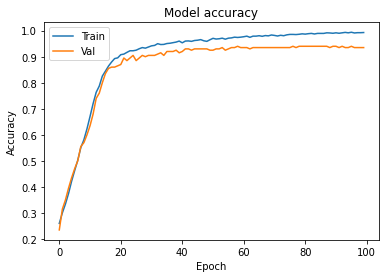

In [29]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

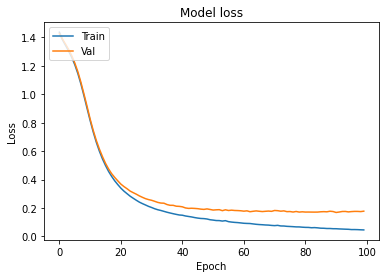

In [30]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [31]:
# Save the model
from pathlib import Path
path = Path('./models')
if not path.exists():
  path.mkdir()
model.save('./models/model_1.h5')

In [32]:
# List files of ./models directory
!ls ./models

model_1.h5


# Exercise 1: Train the model without normalization

In [ ]:
# Split data without normalization in training and validation partitions


In [ ]:
# Train the model


In [ ]:
# Plot training and validation accuracy


In [ ]:
# Plot training and test loss


# Exercise 2: Train a simpler model and evaluate the results

In [ ]:
# Split data with normalization in training and validation partitions


In [ ]:
# Design a model like the previous but without the second Dense layer


In [ ]:
# Compile the model


In [ ]:
# Train the model


In [ ]:
# Plot training and validation accuracy


In [ ]:
# Plot training and test loss


# Exercise 3: Train a more complex model and evaluate the results

In [ ]:
# Split data with normalization in training and validation partitions


In [ ]:
# Design a model like the previous but with 128 neurons in the first Dense layer
# and 256 in the second


In [ ]:
# Compile the model


In [ ]:
# Train the model


In [ ]:
# Plot training and validation accuracy


In [ ]:
# Plot training and test loss


# Exercise 4: Predict the price range of the phones of the test.csv file

In [ ]:
# Read it test data from csv


In [ ]:
# Show column names (pay attention, maybe there is something different)


In [ ]:
# Convert the data to numpy array


In [ ]:
# Show shape of the data


In [ ]:
# Get rid of a column if needed


In [ ]:
# Normalize data. Important!! Always normalize test data with the mean and
# standard deviation learnt from the training data.


In [ ]:
# Show data before and after normalization


In [ ]:
# Load model saved during the example
from keras.models import load_model
model = load_model('./models/model_1.h5')

In [ ]:
# Predict price range
predictions = model.predict(data_norm)

In [ ]:
# Show predictions


In [ ]:
# Convert predictions to scalars from one-hot encoding


In [ ]:
# Show all scalar predictions


In [ ]:
# Show the first test sample in Dataframe format


In [ ]:
# Show prediction for that sample
